In [ ]:
a="purple is the best city in the forest".split()
b="there is an art to getting your way and throwing bananas on the street is not it".split()
c="it is not often you find soggy bananas on the street".split()

In [ ]:
import numpy as np

# merge all docs into a list of list
docs =[a,b,c]

def tfidf(word, sentence):
  frequency = sentence.count(word)
  #term frequency
  tf = frequency/len(sentence)
  #inverse document frequency
  idf = np.log10(len(docs)/sum([1 for doc in docs if word in doc]))
  return round(tf*idf, 4)

In [ ]:
tfidf("is",a)

0.0

In [ ]:
tfidf("forest",a)

0.0596

In [ ]:
vocab = set(a+b+c)
vocab

{'an',
 'and',
 'art',
 'bananas',
 'best',
 'city',
 'find',
 'forest',
 'getting',
 'in',
 'is',
 'it',
 'not',
 'often',
 'on',
 'purple',
 'soggy',
 'street',
 'the',
 'there',
 'throwing',
 'to',
 'way',
 'you',
 'your'}

In [ ]:
vec_a = []
vec_b = []

for word in vocab:
  vec_a.append(tfidf(word,a))
  vec_b.append(tfidf(word,b))

In [ ]:
print(vec_a)

[0.0, 0.0, 0.0, 0.0596, 0.0, 0.0, 0.0, 0.0, 0.0596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0596, 0.0, 0.0596, 0.0, 0.0, 0.0, 0.0596, 0.0]


In [ ]:
print(vec_b)

[0.0281, 0.0281, 0.0281, 0.0, 0.0281, 0.0104, 0.0, 0.0281, 0.0, 0.0, 0.0104, 0.0104, 0.0, 0.0, 0.0281, 0.0104, 0.0281, 0.0, 0.0104, 0.0, 0.0, 0.0281, 0.0281, 0.0, 0.0]


BM25

In [ ]:
a="purple is the best city in the forest".split()
b="there is an art to getting your way and throwing bananas on the street is not it".split()
c="it is not often you find soggy bananas on the street".split()
d="green should have smelled more tranquil but somehow it just tasted rotten".split()
e="joyce enjoyed eating panckaes with ketchup".split()
f="as the asteroid hurtled toward earth becky was upset her dentist appointment had been cancelled".split()
g="to get your way you must not bombard the road with yellow fruit".split() # very similar to b


In [ ]:
docs = [a,b,c,d,e,f]

In [ ]:
avgdl = sum([len(sentence) for sentence in docs])/len(docs)
N = len(docs)

def bm25(word, sentence, k=1.2, b=0.75):
  #term frequency
  freq = sentence.count(word) # or f(q,D) - frequency of the q in the Doc
  tf = (freq * (k+1))/(freq + k * (1 - b + b * len(sentence) / avgdl))
  #inverse document frequency
  N_q = sum([1 for doc in docs if word in doc]) # Number of docs that contain the word
  idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)
  #idf = np.log10(N/sum([1 for doc in docs if word in doc]))
  return round(tf * idf, 4)

In [ ]:
bm25('purple', b)

0.0

In [ ]:
bm25('purple', a)

1.7595

In [ ]:
!pip install sentence-transformers

In [ ]:
a="purple is the best city in the forest"
b="there is an art to getting your way and throwing bananas on the street is not it"
c="it is not often you find soggy bananas on the street"
d="green should have smelled more tranquil but somehow it just tasted rotten"
e="joyce enjoyed eating panckaes with ketchup"
f="as the asteroid hurtled toward earth becky was upset her dentist appointment had been cancelled"
g="to get your way you must not bombard the road with yellow fruit" # very similar to b

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
sentence_embeddings = model.encode([a, b, c, d, e, f,g])

In [ ]:
sentence_embeddings.shape

(7, 768)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#calculate similarity (will store in array)
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
  scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

In [ ]:
scores

array([[1.00000024, 0.17733914, 0.28297707, 0.29628253, 0.23554409,
        0.10553394, 0.21696278],
       [0.17733914, 1.        , 0.71785682, 0.49912864, 0.23153497,
        0.20459959, 0.63264459],
       [0.28297707, 0.71785682, 1.00000012, 0.48864433, 0.31355026,
        0.16886294, 0.55993092],
       [0.29628253, 0.49912864, 0.48864433, 0.99999976, 0.32697588,
        0.3862493 , 0.52388823],
       [0.2355441 , 0.23153502, 0.31355023, 0.32697591, 1.00000012,
        0.15300447, 0.04480614],
       [0.10553394, 0.2045996 , 0.16886291, 0.38624942, 0.15300447,
        1.00000024, 0.23481461],
       [0.21696277, 0.63264465, 0.55993092, 0.52388823, 0.04480613,
        0.23481461, 1.00000012]])

<Axes: >

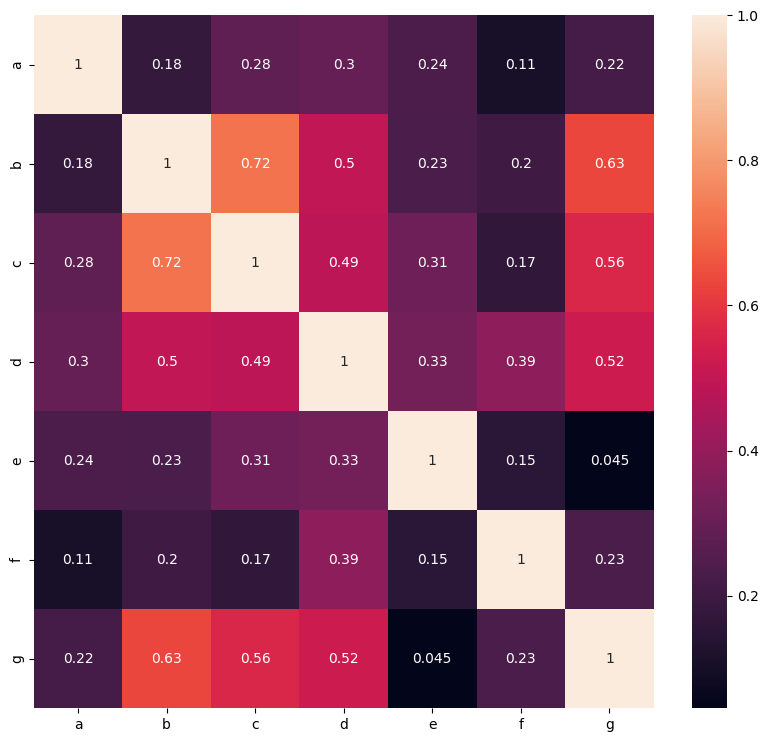

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
labels = ['a','b','c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)
